In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from multiprocessing import Pool, cpu_count
from concurrent.futures import ThreadPoolExecutor, as_completed
import asyncio
import io
import aiofiles
import nest_asyncio
from typing import List


nest_asyncio.apply()

In [17]:
path1 = "data/orthophotos/nw/dop10rgbi_32_462_5766_1_nw_2022.jp2"
path2 = "data/orthophotos/nw/dop10rgbi_32_462_5767_1_nw_2022.jp2"


In [ ]:
image1 = Image.open(path1).convert("RGB")
image_array_1 = np.array(image1)
# image2 = Image.open(path2).convert("RGB")
# image_array_2 = np.array(image2)

(10000, 10000, 3)


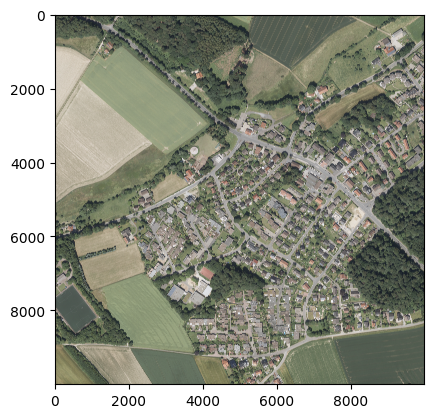

In [20]:
print(image_array_1.shape)
plt.imshow(image_array_1)

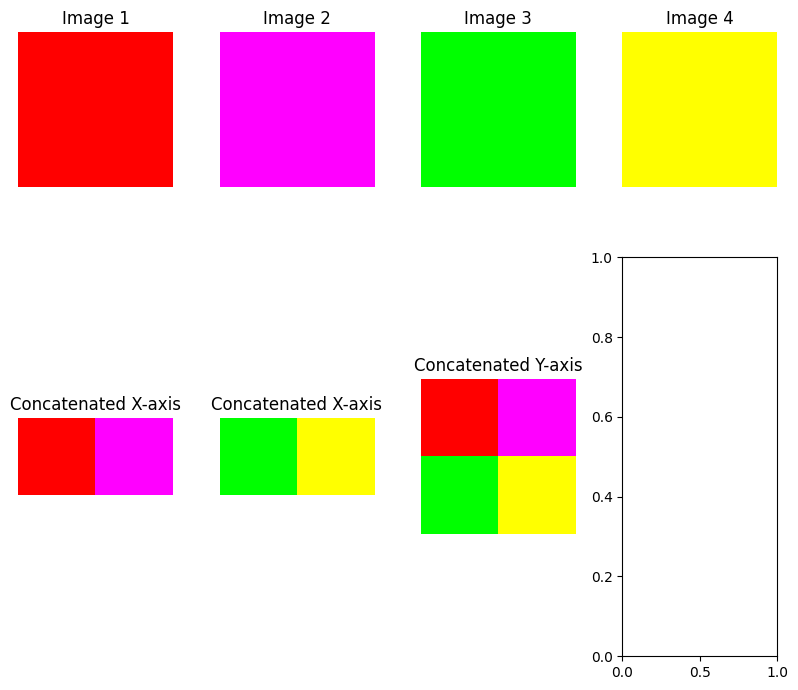

In [16]:
red = [255, 0, 0]
green = [0, 255, 0]
blue = [0, 0, 255]
cyan = [0, 255, 255]
magenta = [255, 0, 255]
yellow = [255, 255, 0]
black = [0, 0, 0]
white = [255, 255, 255]

# Create the 2x2 image array for the first image
image1 = np.array([
    [red, red],
    [red, red]
])

image2 = np.array([
    [magenta, magenta],
    [magenta, magenta]
])

image3 = np.array([
    [green, green],
    [green, green]
])

image4 = np.array([
    [yellow, yellow],
    [yellow, yellow]
])

# Concatenate the images along the x-axis (horizontal)
concatenated_1 = np.concatenate((image1, image2), axis=1)

# Concatenate the images along the y-axis (vertical)
concatenated_2 = np.concatenate((image3, image4), axis=1)

concat_all = np.concatenate((concatenated_1, concatenated_2), axis=0)

# Plot the images
fig, axs = plt.subplots(2, 4, figsize=(8, 8))

# Plot the original images
axs[0, 0].imshow(image1.astype(np.uint8))
axs[0, 0].set_title("Image 1")
axs[0, 0].axis('off')

axs[0, 1].imshow(image2.astype(np.uint8))
axs[0, 1].set_title("Image 2")
axs[0, 1].axis('off')

axs[0, 2].imshow(image3.astype(np.uint8))
axs[0, 2].set_title("Image 3")
axs[0, 2].axis('off')

axs[0, 3].imshow(image4.astype(np.uint8))
axs[0, 3].set_title("Image 4")
axs[0, 3].axis('off')

# Plot the concatenated images
axs[1, 0].imshow(concatenated_1.astype(np.uint8))
axs[1, 0].set_title("Concatenated X-axis")
axs[1, 0].axis('off')

axs[1, 1].imshow(concatenated_2.astype(np.uint8))
axs[1, 1].set_title("Concatenated X-axis")
axs[1, 1].axis('off')

axs[1, 2].imshow(concat_all.astype(np.uint8))
axs[1, 2].set_title("Concatenated Y-axis")
axs[1, 2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()


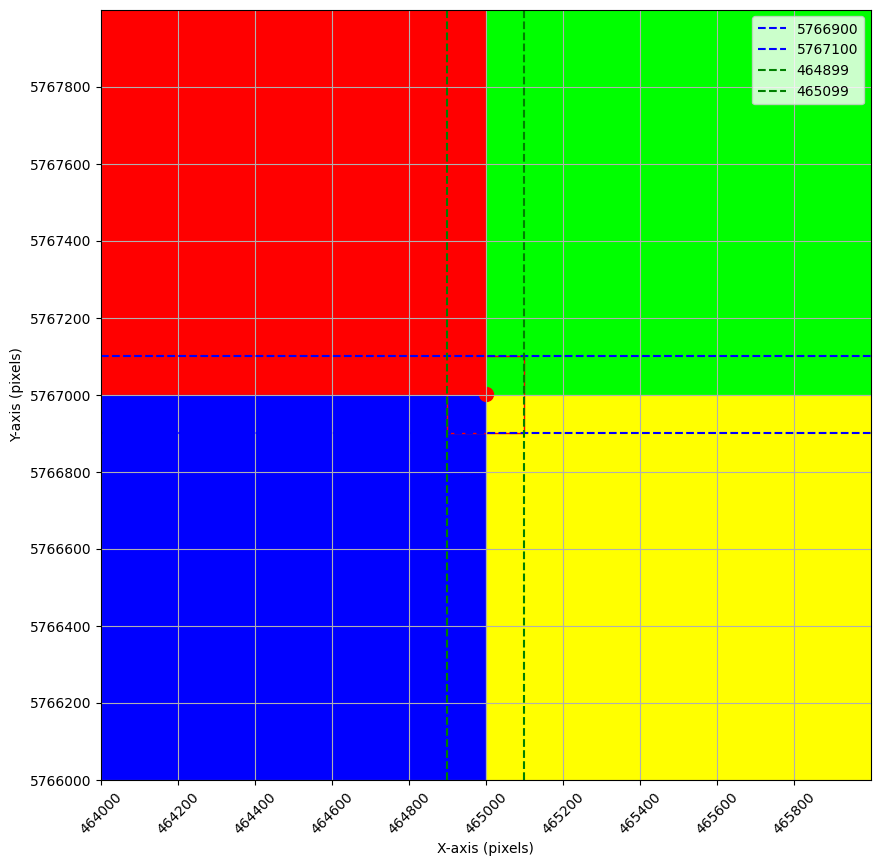

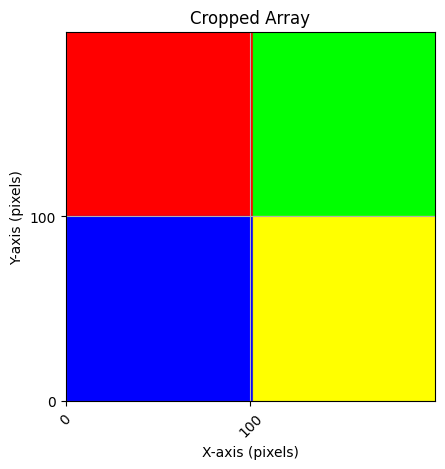

(200, 200, 3)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate a placeholder 2000x2000 array with four different colored tiles
array = np.zeros((2000, 2000, 3))

# Define colors for the four quadrants
color1 = [1, 0, 0]  # Red
color2 = [0, 1, 0]  # Green
color3 = [0, 0, 1]  # Blue
color4 = [1, 1, 0]  # Yellow

# Fill the quadrants
array[0:1000, 0:1000] = color1
array[0:1000, 1000:2000] = color2
array[1000:2000, 0:1000] = color3
array[1000:2000, 1000:2000] = color4

# Define the coordinates for the entire map and the cropped area
x_min_map = 464000
x_max_map = 465999
y_min_map = 5766000
y_max_map = 5767999

x_min_crop = 464899
x_max_crop = 465098
y_min_crop = 5766900
y_max_crop = 5767099

# Calculate the indices for cropping
x_start_index = x_min_crop - x_min_map
x_end_index = x_max_crop - x_min_map + 1  # Adjust to include 200 pixels
y_start_index = y_min_crop - y_min_map
y_end_index = y_max_crop - y_min_map + 1  # Adjust to include 200 pixels

# Coordinates for the red point
x = 464999
y = 5767000

# Crop the sub-region from the array
cropped_array = array[y_start_index:y_end_index, x_start_index:x_end_index]

# Plotting the original image with the marked rectangle
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(array, extent=[0, 2000, 0, 2000])

# Marking the specific axis values
ax.axhline(y=2000 * (5766900 - y_min_map) / (y_max_map - y_min_map), color='blue', linestyle='--', label='5766900')
ax.axhline(y=2000 * (5767100 - y_min_map) / (y_max_map - y_min_map), color='blue', linestyle='--', label='5767100')
ax.axvline(x=2000 * (464899 - x_min_map) / (x_max_map - x_min_map), color='green', linestyle='--', label='464899')
ax.axvline(x=2000 * (465099 - x_min_map) / (x_max_map - x_min_map), color='green', linestyle='--', label='465099')

# Drawing a red point
ax.scatter(2000 * (x - x_min_map) / (x_max_map - x_min_map), 
           2000 * (y - y_min_map) / (y_max_map - y_min_map), 
           color='red', s=100)

# Drawing a red rectangle
rect = patches.Rectangle(
    (2000 * (x_min_crop - x_min_map) / (x_max_map - x_min_map), 2000 * (y_min_crop - y_min_map) / (y_max_map - y_min_map)),
    2000 * (x_max_crop - x_min_crop) / (x_max_map - x_min_map),
    2000 * (y_max_crop - y_min_crop) / (y_max_map - y_min_map),
    linewidth=1,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)

# Adding labels and legend
ax.set_xlabel('X-axis (pixels)')
ax.set_ylabel('Y-axis (pixels)')
ax.legend()

# Set grid with a raster of 100 pixels and label every 200 pixels
ax.set_xticks(np.arange(0, 2000, 200))
ax.set_xticklabels(np.arange(x_min_map, x_max_map, 200), rotation=45)
ax.set_yticks(np.arange(0, 2000, 200))
ax.set_yticklabels(np.arange(y_min_map, y_max_map, 200))
ax.grid(True)


# Display the plot with the rectangle
plt.show()

# Plotting the cropped array with corrected extents
fig, ax = plt.subplots()
ax.imshow(cropped_array, extent=[0, 200, 0, 200])
plt.title("Cropped Array")
plt.xlabel('X-axis (pixels)')
plt.ylabel('Y-axis (pixels)')
ax.set_xticks(np.arange(0, 200, 100))
ax.set_xticklabels(np.arange(0, 200, 100), rotation=45)
ax.set_yticks(np.arange(0, 200, 100))
ax.set_yticklabels(np.arange(0, 200, 100))
ax.grid(True, which='both')
plt.show()

# Return the shape of the cropped array to verify dimensions
cropped_array.shape
